 이 크롤러는 구글 사이트의 이미지 수집용 웹크롤러입니다.
1.크롤링할 이미지의 키워드는 무엇입니까?: 고양이
2.수집할 건수는 총 몇건입니까?: 5






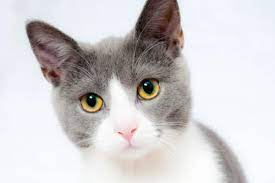
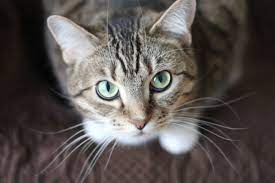
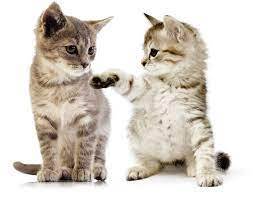
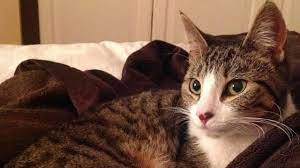
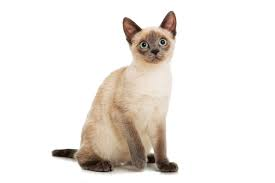

1 번째 이미지 저장중입니다=======
2 번째 이미지 저장중입니다=======
3 번째 이미지 저장중입니다=======
4 번째 이미지 저장중입니다=======
5 번째 이미지 저장중입니다=======
총 저장 건수는 5 건 입니다 
파일 저장 경로: C:\Users\Windows\Desktop\대학교\4학년 여름방학\Big_AI\크롤링\코드\Chap_6\출력 파일\2022-07-08-11-42-56-고양이 입니다


In [3]:
#1. 구글 사이트에서 이미지를 검색하여 수집하는 크롤러
# Step 1. 필요한 모듈과 라이브러리를 로딩하고 검색어를 입력 받습니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import urllib.request # 이미지 주소로 이미지를 다운받는 모듈
import urllib.parse # 한글을 변환해주는 모듈
import time
import math
import os
import random

#Step 2. 사용자에게 검색 관련 정보들을 입력 받습니다.
print("=" *100)
print(" 이 크롤러는 구글 사이트의 이미지 수집용 웹크롤러입니다.")
print("=" *100)
query_txt = input('1.크롤링할 이미지의 키워드는 무엇입니까?: ')
cnt = int(input('2.수집할 건수는 총 몇건입니까?: '))
page_cnt = math.ceil( cnt / 50)

f_dir = "C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\크롤링\\코드\\Chap_6\\출력 파일\\"

#Step 3. 크롬 드라이버 설정 및 웹 페이지 열기
s = Service("C:\\chromedriver.exe")
driver = webdriver.Chrome(service=s)

url = 'https://www.google.com/'
driver.get(url)
driver.maximize_window()
time.sleep(3)

#Step 4. 자동으로 검색어 입력 후 조회하기
element = driver.find_element(By.NAME,'q')
driver.find_element(By.NAME,'q').click( )
element.send_keys(query_txt)
element.send_keys("\n")

#Step 5. 스크롤 내려주기
driver.find_element(By.LINK_TEXT, "이미지").click()

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)

i = 1
while (i <= page_cnt):
    scroll_down(driver) 
    i += 1

    if i ==  6 :
        driver.find_element(By.XPATH,'//*[@id="islmp"]/div/div/div/div[1]/div[2]/div[2]/input').click()
    
# Step 6. 이미지 추출하여 저장하기 
file_no = 0                                
count = 1
img_src2=[]  # 이미지 원본 URL 주소 저장할 리스트

n = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' % (n.tm_year, n.tm_mon, n.tm_mday, n.tm_hour, n.tm_min, n.tm_sec)
img_dir = f_dir+s+'-'+query_txt
os.makedirs(img_dir)
os.chdir(img_dir)

time.sleep(4)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
img_src = soup.find('div','mJxzWe').find_all('img')

for i in img_src :
    img_src1=i['src']
    img_src2.append(img_src1)
    print(img_src1)
    count += 1
    if count > cnt :
        break

for i in range(0,len(img_src2)) :
    file_no += 1 
    try :
        urllib.request.urlretrieve(img_src2[i],str(file_no)+'.jpg') # 힌글이 없어서 urllib.parse.quote 사용 x
    except TypeError:
        continue

    time.sleep(0.5)      
    print("%s 번째 이미지 저장중입니다=======" %file_no)

# Step 7. 요약 정보를 출력합니다                
print("=" *70)
print("총 저장 건수는 %s 건 입니다 " %file_no)
print("파일 저장 경로: %s 입니다" %img_dir)
print("=" *70)

driver.close( )

In [9]:
#2. 네이버 사이트에서 이미지를 검색하여 수집하는 크롤러

# Step 1. 필요한 모듈과 라이브러리를 로딩하고 검색어를 입력 받습니다
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import urllib.request # 이미지 주소로 이미지를 다운받는 모듈
import urllib.parse # 한글을 변환해주는 모듈
import time
import math
import os
import random

#Step 2. 사용자에게 검색 관련 정보들을 입력 받습니다.
print("=" *100)
print(" 이 크롤러는 네이버 사이트의 이미지 수집용 웹크롤러입니다.")
print("=" *100)
query_txt = input('1.크롤링할 이미지의 키워드는 무엇입니까?: ')
cnt = int(input('2.수집할 건수는 총 몇건입니까?: '))
page_cnt = math.ceil(cnt / 20)

f_dir = "C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\크롤링\\코드\\Chap_6\\출력 파일\\"

#Step 3. 크롬 드라이버 설정 및 웹 페이지 열기
s = Service("C:\\chromedriver.exe")
driver = webdriver.Chrome(service=s)

url = 'https://www.naver.com/'
driver.get(url)
driver.maximize_window()
time.sleep(3)

#Step 4. 자동으로 검색어 입력 후 조회하기
element = driver.find_element(By.ID,'query')
driver.find_element(By.ID,'query').click( )
element.send_keys(query_txt)
element.send_keys("\n")

#Step 5. 스크롤 내려주기
driver.find_element(By.LINK_TEXT, "이미지").click()

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)

i = 1
while (i <= page_cnt):
    scroll_down(driver) 
    i += 1
    
# Step 6. 이미지 추출하여 저장하기 
file_no = 0                                
count = 1
img_src2=[]  # 이미지 원본 URL 주소 저장할 리스트

n = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' % (n.tm_year, n.tm_mon, n.tm_mday, n.tm_hour, n.tm_min, n.tm_sec)
img_dir = f_dir+s+'-'+query_txt
os.makedirs(img_dir)
os.chdir(img_dir)

time.sleep(4)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
img_src = soup.find('div','photo_tile _grid').find_all('img')

for i in img_src :
    img_src1=i['src']
    img_src2.append(img_src1)
    print(img_src1)
    count += 1
    if count > cnt :
        break

for i in range(0,len(img_src2)) :
    file_no += 1 
    try :
        urllib.request.urlretrieve(img_src2[i],str(file_no)+'.jpg') # 힌글이 없어서 urllib.parse.quote 사용 x
    except TypeError:
        continue

    time.sleep(0.5)      
    print("%s 번째 이미지 저장중입니다=======" %file_no)

# Step 7. 요약 정보를 출력합니다                
print("=" *70)
print("총 저장 건수는 %s 건 입니다 " %file_no)
print("파일 저장 경로: %s 입니다" %img_dir)
print("=" *70)

driver.close( )

 pixabay 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다 
1.크롤링할 이미지의 키워드는 무엇입니까?: 제주도
2.크롤링 할 건수는 몇건입니까?: 5


요청하신 데이터를 수집 중이오니 잠시만 기다려 주세요~~^^
https://cdn.pixabay.com/photo/2020/02/01/16/42/jusangjeolli-cliff-4810725__480.jpg
https://cdn.pixabay.com/photo/2018/05/12/20/15/lemur-3394482__340.jpg
https://cdn.pixabay.com/photo/2016/09/21/04/17/jeju-island-1684040__340.jpg
https://cdn.pixabay.com/photo/2020/05/05/07/52/republic-of-korea-5131925__340.jpg
https://cdn.pixabay.com/photo/2016/11/18/07/45/mark-1833559__340.jpg


<ipython-input-9-2a472be417f5>:92: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  urllib.urlopener = AppURLopener()


1 페이지에서 1 번째 이미지 저장중입니다=======
1 페이지에서 2 번째 이미지 저장중입니다=======
1 페이지에서 3 번째 이미지 저장중입니다=======
1 페이지에서 4 번째 이미지 저장중입니다=======
1 페이지에서 5 번째 이미지 저장중입니다=======
총 소요시간은 25.6 초 입니다 
총 저장 건수는 5 건 입니다 
파일 저장 경로: C:\Users\Windows\Desktop\대학교\4학년 여름방학\Big_AI\크롤링\코드\Chap_6\출력 파일\2022-07-08-10-06-11-제주도 입니다
